In [ ]:
# This will load the dataset.You will see a folder called ALL in your workspace.
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/song_genre.zip"
!unzip -qo song_genre.zip
!rm song_genre.zip

--2023-11-09 06:56:44--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/song_genre.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.63, 16.12.36.119, 52.219.158.171, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234413 (229K) [application/zip]
Saving to: ‘song_genre.zip’

song_genre.zip      100%[===================>] 228.92K   361KB/s    in 0.6s    

2023-11-09 06:56:46 (361 KB/s) - ‘song_genre.zip’ saved [234413/234413]



In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=4b6754cc46e278e789a825ee12523867dd3fa7194823478c5a6ca3fe77787e26
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
datatrain = pd.read_csv("song_genre.csv")

In [ ]:
datatrain.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [ ]:
datatrain = datatrain.set_index("filename")

In [ ]:
datatrain.describe()


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378669,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479170,99.552199,-8.921949,36.293061,...,-6.021121,4.471604,-4.797232,1.781547,-3.870276,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081706,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235659,31.331904,21.695015,16.666986,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064026,-1.527147,-89.901138,-18.768461,...,-28.052265,-15.805225,-27.542309,-12.598773,-17.545473,-15.693589,-17.227766,-11.975698,-18.504187,-19.935202
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695129,76.811485,-24.223789,24.107393,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194296,-2.003978,-4.670281,-3.367999
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206070,98.452553,-10.716073,36.957073,...,-5.920161,3.891842,-4.199810,1.879423,-3.614473,1.211945,-4.059109,0.669789,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895018,119.893629,5.505793,48.212825,...,-1.004241,9.706133,-0.161017,5.155263,-0.323536,4.350694,-0.842968,3.112519,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034588,193.096512,56.666088,80.691277,...,17.421038,23.037573,13.054334,18.161661,12.357588,13.468802,11.489994,15.379257,14.686911,15.368967


In [ ]:
datatrain.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [ ]:
X = datatrain.iloc[: ,:-1].values
Y = datatrain['label'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 26), (750, 10), (250, 26), (250, 10))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 26), (750, 10), (250, 26), (250, 10))

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

NameError: ignored

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
checkpointer = ModelCheckpoint('song_genreModel.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, batch_size=64, epochs=250, validation_data=(x_test, y_test), callbacks=[checkpointer])

Epoch 1/250
 8/12 [===================>..........] - ETA: 0s - loss: 2.2711 - acc: 0.1738 
Epoch 1: val_acc improved from -inf to 0.32400, saving model to song_genreModel.h5
12/12 [==============================] - 2s 33ms/step - loss: 2.2208 - acc: 0.2027 - val_loss: 2.0119 - val_acc: 0.3240
Epoch 2/250
 9/12 [=====================>........] - ETA: 0s - loss: 1.9713 - acc: 0.2865
Epoch 2: val_acc did not improve from 0.32400
12/12 [==============================] - 0s 12ms/step - loss: 1.9320 - acc: 0.3027 - val_loss: 1.7798 - val_acc: 0.3160
Epoch 3/250


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 7/12 [================>.............] - ETA: 0s - loss: 1.7437 - acc: 0.3705
Epoch 3: val_acc improved from 0.32400 to 0.39200, saving model to song_genreModel.h5
12/12 [==============================] - 0s 13ms/step - loss: 1.7339 - acc: 0.3747 - val_loss: 1.5948 - val_acc: 0.3920
Epoch 4/250
 8/12 [===================>..........] - ETA: 0s - loss: 1.6378 - acc: 0.4160
Epoch 4: val_acc improved from 0.39200 to 0.43600, saving model to song_genreModel.h5
12/12 [==============================] - 0s 13ms/step - loss: 1.6344 - acc: 0.4147 - val_loss: 1.5108 - val_acc: 0.4360
Epoch 5/250
 9/12 [=====================>........] - ETA: 0s - loss: 1.4780 - acc: 0.4913
Epoch 5: val_acc improved from 0.43600 to 0.48000, saving model to song_genreModel.h5
12/12 [==============================] - 0s 14ms/step - loss: 1.5083 - acc: 0.4693 - val_loss: 1.4032 - val_acc: 0.4800
Epoch 6/250
 7/12 [================>.............] - ETA: 0s - loss: 1.4636 - acc: 0.4821
Epoch 6: val_acc improved from 0.4

In [ ]:
present_model = tf.keras.models.load_model('song_genreModel.h5')
present_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               13824     
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                16448     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 10)               

In [ ]:
print("Accuracy of our model on test data : " , present_model.evaluate(x_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 3ms/step - loss: 1.4087 - acc: 0.7200
Accuracy of our model on test data :  72.00000286102295 %


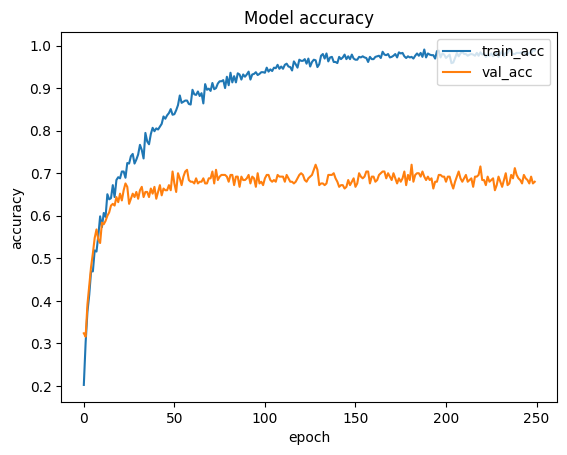

In [ ]:
# plot the training artifacts
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

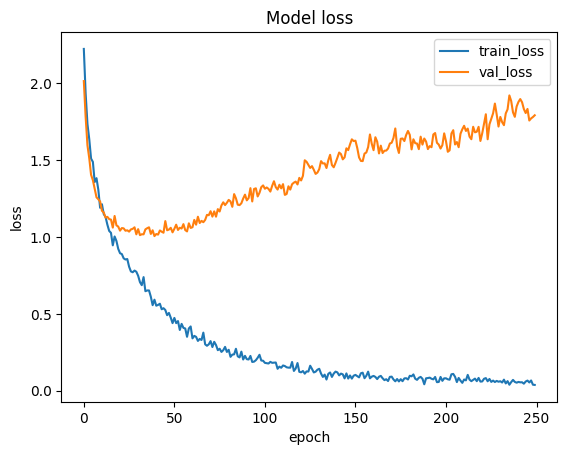

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# predicting on test data.
pred_test = present_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)


8/8 [==============================] - 0s 2ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,rock,rock
1,rock,reggae
2,country,country
3,jazz,jazz
4,metal,metal
5,rock,rock
6,blues,blues
7,country,country
8,rock,disco
9,pop,pop
